#head

In [ ]:
!pip install pyswarm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4478 sha256=11f13c2c3ed956e9a365880323807faf7c689ebdfc7ba46927f456c559440eca
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from pyswarm import pso
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/research project/'

/content/drive/MyDrive/research project


In [ ]:
df2 = pd.read_csv('city_day.csv')
df2.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
train_dates = pd.to_datetime(df2['Date'])
print(train_dates.tail(15)) #Check last few dates. 


29516   2020-06-17
29517   2020-06-18
29518   2020-06-19
29519   2020-06-20
29520   2020-06-21
29521   2020-06-22
29522   2020-06-23
29523   2020-06-24
29524   2020-06-25
29525   2020-06-26
29526   2020-06-27
29527   2020-06-28
29528   2020-06-29
29529   2020-06-30
29530   2020-07-01
Name: Date, dtype: datetime64[ns]


In [ ]:
pollutants = df2[(df2['Date'] > '2015-12-31') & (df2['Date'] < '2020-01-01') & (df2['City'] == 'Delhi')]
pollutants

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10594,Delhi,2016-01-01,295.71,476.09,86.62,94.04,131.36,79.87,2.42,23.57,108.14,5.81,16.30,0.00,463.0,Severe
10595,Delhi,2016-01-02,239.21,395.29,69.42,81.22,126.63,65.11,2.15,23.33,90.45,5.79,17.65,NaN,465.0,Severe
10596,Delhi,2016-01-03,270.10,484.82,54.41,76.67,101.63,66.40,2.39,19.94,97.03,5.33,10.78,NaN,426.0,Severe
10597,Delhi,2016-01-04,339.80,586.20,124.31,133.95,164.05,73.73,2.97,27.90,91.20,7.12,19.01,NaN,496.0,Severe
10598,Delhi,2016-01-05,318.10,535.30,106.93,118.81,159.99,78.22,2.85,30.24,131.40,6.45,21.32,NaN,528.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12050,Delhi,2019-12-27,240.07,371.45,28.66,54.60,54.95,52.64,1.39,7.88,27.55,4.62,32.86,0.20,372.0,Very Poor
12051,Delhi,2019-12-28,275.60,426.12,60.13,55.98,83.47,50.47,1.96,10.26,27.92,6.70,39.22,0.40,425.0,Severe
12052,Delhi,2019-12-29,326.79,500.15,32.73,57.76,61.51,49.61,1.86,10.25,35.11,6.28,33.00,0.34,455.0,Severe
12053,Delhi,2019-12-30,333.43,486.35,54.97,55.61,79.04,50.75,2.24,11.15,26.44,8.00,47.12,0.72,506.0,Severe


In [ ]:
pollutants = pollutants.reset_index(drop=True)
pollutants.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,2016-01-01,295.71,476.09,86.62,94.04,131.36,79.87,2.42,23.57,108.14,5.81,16.30,0.0,463.0,Severe
1,Delhi,2016-01-02,239.21,395.29,69.42,81.22,126.63,65.11,2.15,23.33,90.45,5.79,17.65,NaN,465.0,Severe
2,Delhi,2016-01-03,270.10,484.82,54.41,76.67,101.63,66.40,2.39,19.94,97.03,5.33,10.78,NaN,426.0,Severe
3,Delhi,2016-01-04,339.80,586.20,124.31,133.95,164.05,73.73,2.97,27.90,91.20,7.12,19.01,NaN,496.0,Severe
4,Delhi,2016-01-05,318.10,535.30,106.93,118.81,159.99,78.22,2.85,30.24,131.40,6.45,21.32,NaN,528.0,Severe


In [ ]:
pollutants = pollutants.drop(columns=['City', 'NH3','NO', 'Benzene',	'Toluene',	'Xylene', 'AQI_Bucket'])
pollutants.head()

,Date,PM2.5,PM10,NO2,NOx,CO,SO2,O3,AQI
0,2016-01-01,295.71,476.09,94.04,131.36,2.42,23.57,108.14,463.0
1,2016-01-02,239.21,395.29,81.22,126.63,2.15,23.33,90.45,465.0
2,2016-01-03,270.10,484.82,76.67,101.63,2.39,19.94,97.03,426.0
3,2016-01-04,339.80,586.20,133.95,164.05,2.97,27.90,91.20,496.0
4,2016-01-05,318.10,535.30,118.81,159.99,2.85,30.24,131.40,528.0


In [ ]:
pollutants['Date'] = pd.to_datetime(pollutants['Date'], format='%Y-%m-%d')

In [ ]:
pollutants.columns

Index(['Date', 'PM2.5', 'PM10', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'AQI'], dtype='object')

In [ ]:
pollutants = pollutants.set_index('Date')
pollutants.head()

,PM2.5,PM10,NO2,NOx,CO,SO2,O3,AQI
Date,,,,,,,,
2016-01-01,295.71,476.09,94.04,131.36,2.42,23.57,108.14,463.0
2016-01-02,239.21,395.29,81.22,126.63,2.15,23.33,90.45,465.0
2016-01-03,270.10,484.82,76.67,101.63,2.39,19.94,97.03,426.0
2016-01-04,339.80,586.20,133.95,164.05,2.97,27.90,91.20,496.0
2016-01-05,318.10,535.30,118.81,159.99,2.85,30.24,131.40,528.0


### Handle Missing Values

In [ ]:
df=pollutants

In [ ]:
df.isnull().sum(axis=0)

PM2.5      2
PM10      70
NO2        2
NOx        0
CO         0
SO2      110
O3        84
AQI       10
dtype: int64

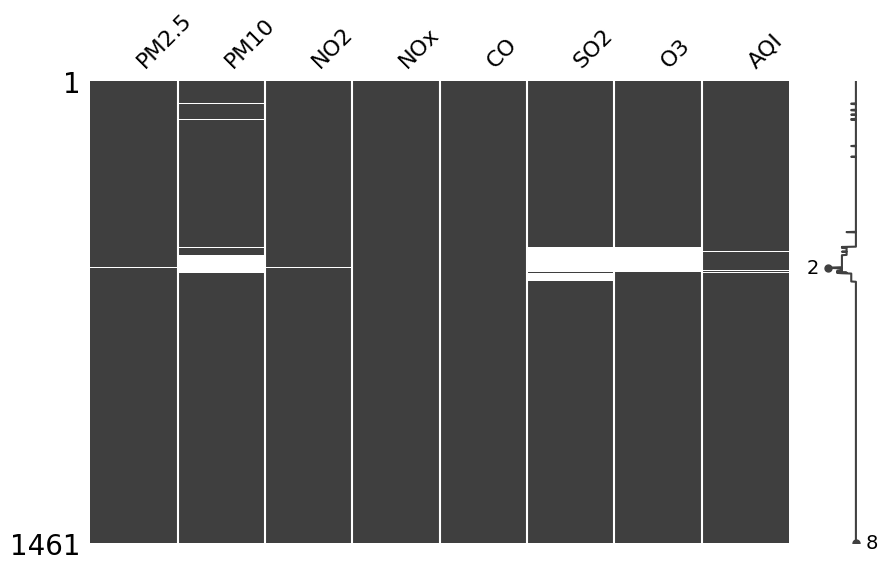

In [ ]:
import missingno as msno
msno.matrix(df, figsize=(10,6))
plt.show()

In [ ]:
df = df.loc[~df['AQI'].isna()]
df.shape
# 20 rows deleted

(1451, 8)

In [ ]:
# target = target.loc[~target.isna()]
# target.shape

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1451 entries, 2016-01-01 to 2019-12-31
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   1450 non-null   float64
 1   PM10    1389 non-null   float64
 2   NO2     1450 non-null   float64
 3   NOx     1451 non-null   float64
 4   CO      1451 non-null   float64
 5   SO2     1349 non-null   float64
 6   O3      1375 non-null   float64
 7   AQI     1451 non-null   float64
dtypes: float64(8)
memory usage: 102.0 KB


#### Interpolate the missing values
bfill, ffill, interpolate

Time series data has a lot of variations against time. Hence, imputing using backfill and forward fill isn't the best possible solution to address the missing value problem. A more apt alternative would be to use interpolation methods, where the values are filled with incrementing or decrementing values.

In [ ]:
df.interpolate(limit_direction="both", inplace=True)
df.isnull().sum(axis=0)

<ipython-input-19-5c16789705ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.interpolate(limit_direction="both", inplace=True)


PM2.5    0
PM10     0
NO2      0
NOx      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

In [ ]:
df.shape

(1451, 8)

In [ ]:
df.describe()

,PM2.5,PM10,NO2,NOx,CO,SO2,O3,AQI
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.00000,1451.000000,1451.000000
mean,122.234890,240.514797,53.056230,55.547588,1.279628,16.96428,50.250941,259.859407
std,88.808341,125.143607,23.001981,34.486095,0.701345,8.26954,26.325901,125.927925
min,10.240000,18.590000,10.630000,0.000000,0.000000,2.94000,14.880000,29.000000
25%,57.140000,142.665000,34.820000,31.500000,0.890000,10.87500,33.095000,155.000000
50%,97.270000,226.740000,49.900000,50.710000,1.180000,15.50000,42.600000,254.000000
75%,163.675000,317.975000,65.760000,71.250000,1.620000,20.65000,57.905000,350.000000
max,685.360000,796.880000,162.500000,213.610000,5.000000,71.56000,257.730000,716.000000


In [ ]:
df.head()

,PM2.5,PM10,NO2,NOx,CO,SO2,O3,AQI
Date,,,,,,,,
2016-01-01,295.71,476.09,94.04,131.36,2.42,23.57,108.14,463.0
2016-01-02,239.21,395.29,81.22,126.63,2.15,23.33,90.45,465.0
2016-01-03,270.10,484.82,76.67,101.63,2.39,19.94,97.03,426.0
2016-01-04,339.80,586.20,133.95,164.05,2.97,27.90,91.20,496.0
2016-01-05,318.10,535.30,118.81,159.99,2.85,30.24,131.40,528.0


In [ ]:
pollutants.shape
# 2016=leap year, so (365*3)+366 = 1461 days i.e. 1461 rows in dataset

(1461, 8)

#Data visualisation 
No need to run again

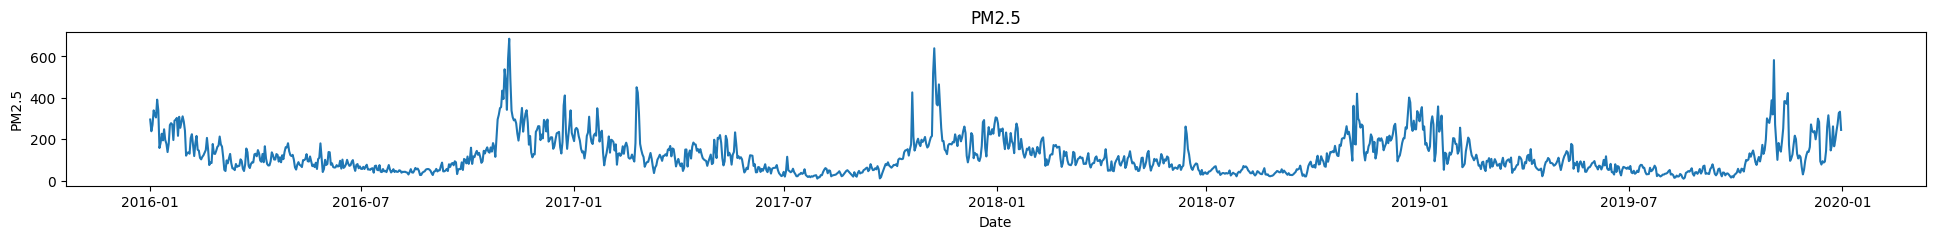

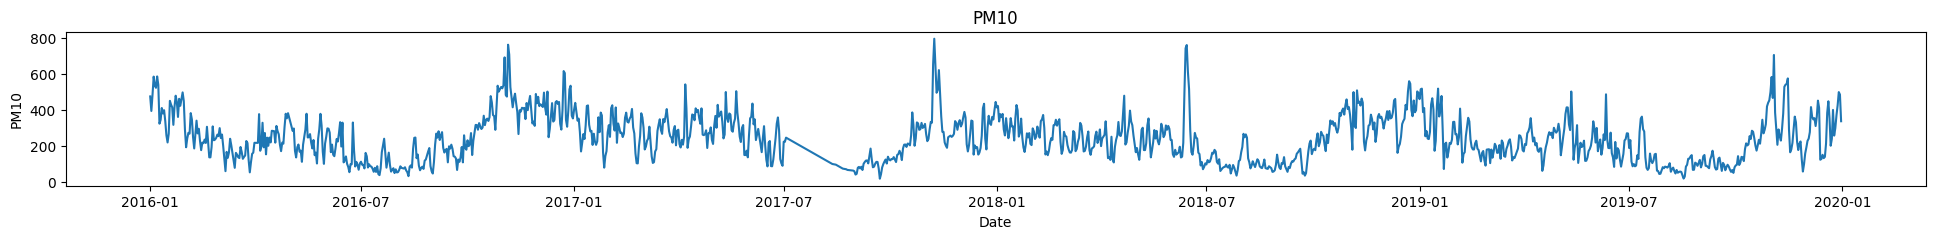

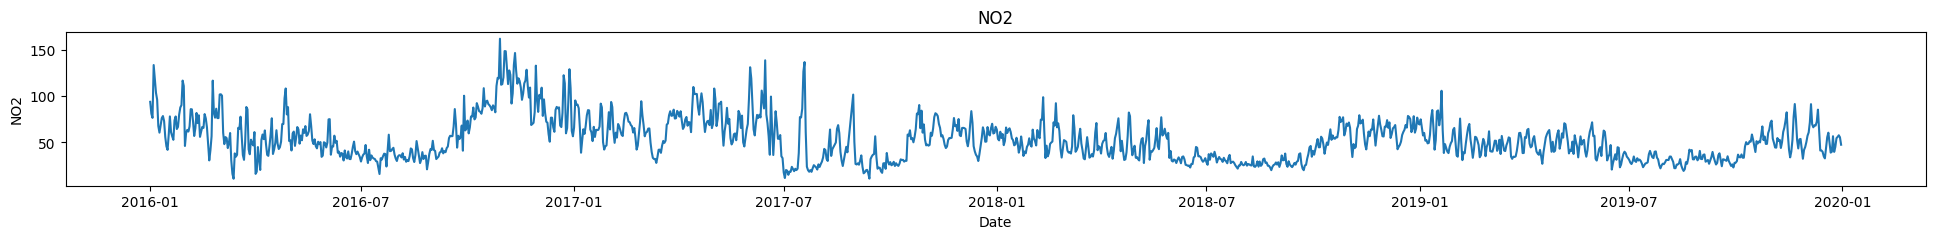

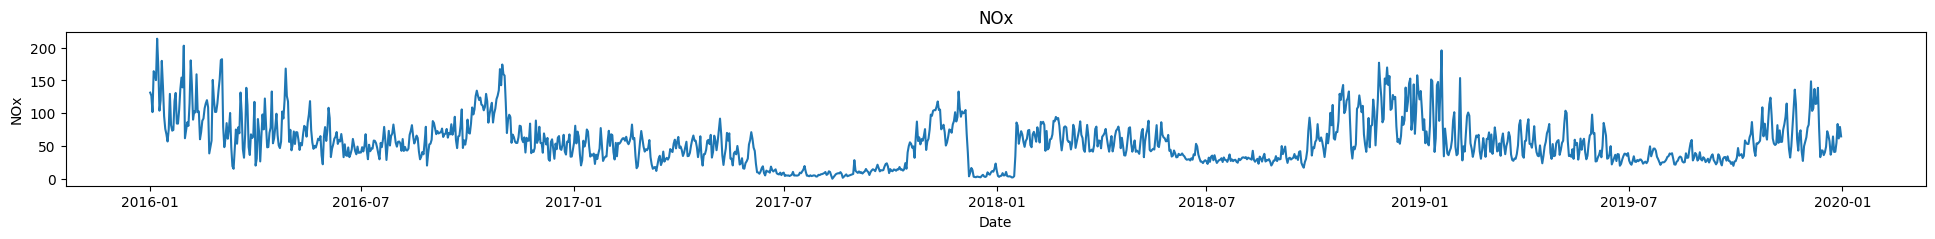

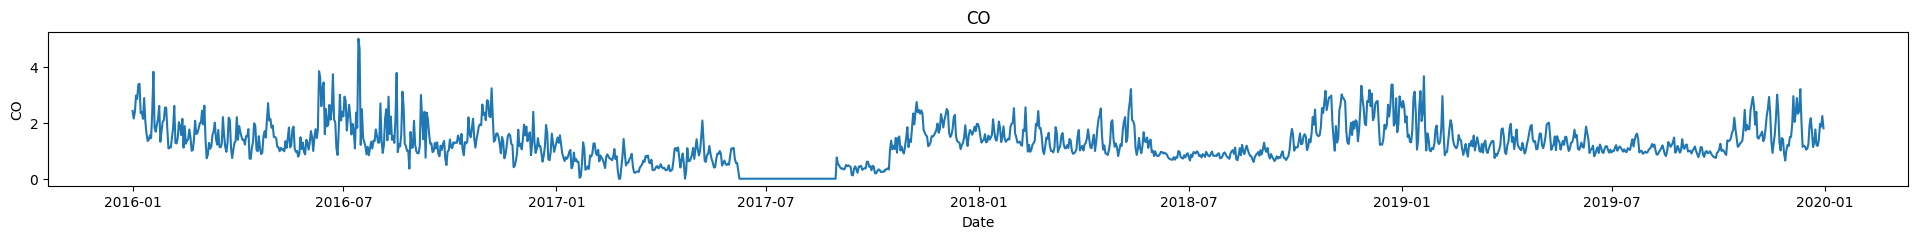

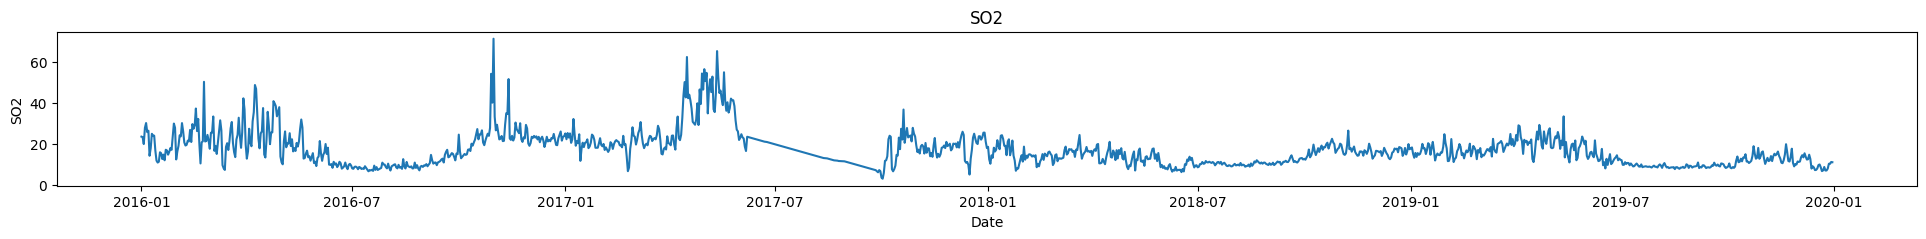

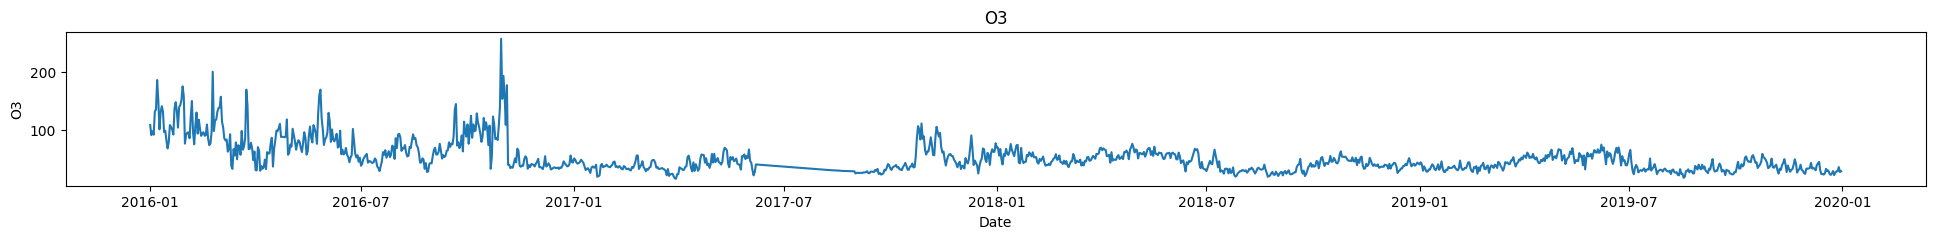

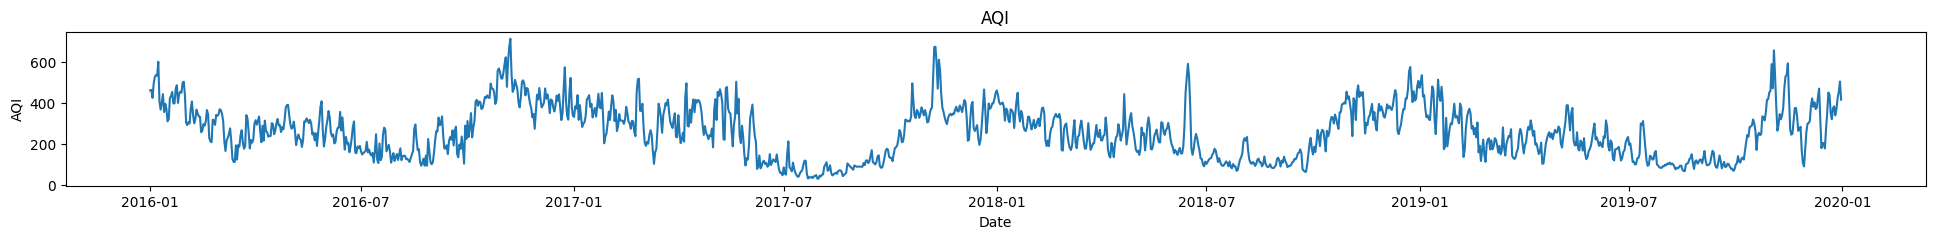

In [ ]:
for col in df.columns:
  plt.rcParams['figure.figsize'] = [24,2]
  plt.plot(df[col])
  # naming the x axis
  plt.xlabel('Date')
  # naming the y axis
  plt.ylabel(col)
    
  # giving a title to my graph
  plt.title(col)
    
  # function to show the plot
  plt.show()

In [ ]:
df.tail()

,PM2.5,PM10,NO2,NOx,CO,SO2,O3,AQI
Date,,,,,,,,
2019-12-27,240.07,371.45,54.60,54.95,1.39,7.88,27.55,372.0
2019-12-28,275.60,426.12,55.98,83.47,1.96,10.26,27.92,425.0
2019-12-29,326.79,500.15,57.76,61.51,1.86,10.25,35.11,455.0
2019-12-30,333.43,486.35,55.61,79.04,2.24,11.15,26.44,506.0
2019-12-31,245.53,338.18,47.50,64.57,1.80,11.03,28.07,417.0


#Feature Scaling


In [ ]:
#Variables for training
cols = list(df)[0:df.shape[1]]
#Date and AQI columns are not used in training. 
print(cols) #['CO', 'NO', 'NO2', 'O3', 'SO2', 'pm2_5', 'pm10', 'NH3', 'AQI']


['PM2.5', 'PM10', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'AQI']


In [ ]:
df.isnull().sum()

PM2.5    0
PM10     0
NO2      0
NOx      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

In [ ]:
df_for_training = df[cols].astype(float)
df_for_training.shape

(1451, 8)

In [ ]:
df_for_training.head()

,PM2.5,PM10,NO2,NOx,CO,SO2,O3,AQI
Date,,,,,,,,
2016-01-01,295.71,476.09,94.04,131.36,2.42,23.57,108.14,463.0
2016-01-02,239.21,395.29,81.22,126.63,2.15,23.33,90.45,465.0
2016-01-03,270.10,484.82,76.67,101.63,2.39,19.94,97.03,426.0
2016-01-04,339.80,586.20,133.95,164.05,2.97,27.90,91.20,496.0
2016-01-05,318.10,535.30,118.81,159.99,2.85,30.24,131.40,528.0


In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled= scaler.transform(df_for_training)

In [ ]:
df_for_training_scaled=np.c_[df_for_training_scaled,df['AQI'].to_numpy()]

In [ ]:
df_for_training_scaled.shape

(1451, 9)

#Training the model

In [ ]:
trainX = []
trainY = []

aqi_index=len(cols)-1

n_future = 5   # Number of days we want to look into the future based on the past days.
n_past = 5  # Number of past days we want to use to predict the future.

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training_scaled.shape[1]-1])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, -2])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (1442, 5, 8).
trainY shape == (1442, 1).


In [ ]:
trainY[0]

array([0.85904597])

In [ ]:
df_for_training_scaled[n_past]

array([  2.06442656,   2.26614008,   2.20595161,   2.75140209,
         2.98154536,   1.06641471,   3.22185709,   2.20948997,
       538.        ])

In [ ]:
n_days_for_prediction=200 

In [ ]:
X_train=trainX[:-n_days_for_prediction]
y_train=trainY[:-n_days_for_prediction]
X_test = trainX[-n_days_for_prediction:]
y_test=df.tail(n_days_for_prediction)['AQI'].values.reshape(n_days_for_prediction,1)

In [ ]:

# hyperparams = {
#     'num_units': (32, 200),
#     'num_layers': (1, 5),
#     'dropout': (0.0, 0.5),
#     'batch_size': (32, 128),
#     'epochs': (10, 50)
# }

# bound = (np.array(list(hyperparams.values()))[:, 0], np.array(list(hyperparams.values()))[:, 1])
lb=[50,  2,  0, 32, 10]
ub=[200 ,   5 ,   0.5, 128 ,  50 ]


In [ ]:
# Define a function to evaluate the fitness of a set of hyperparameters
iter=0
def objective_function(params,X_train,y_train):
    global iter
    print(iter)
    iter+=1
   # Set the random seed for reproducibility
    np.random.seed(42)

    # Define the LSTM model with the given hyperparameters
    model = Sequential()
    for i in range(int(params[1])):
        if i == 0:
            model.add(LSTM(units=int(params[0]), input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
        elif i == int(params[1])-1:
            model.add(LSTM(units=int(params[0]), dropout=float(params[2])))
        else:
            model.add(LSTM(units=int(params[0]), return_sequences=True, dropout=float(params[2])))
        # else:
        #     model.add(LSTM(units=int(params[0]), dropout=float(params[2])))
            # print("hi")
    
    model.add(Dense(trainY.shape[1]))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    # model.summary()

    # Train the model
    model.fit(X_train, y_train, batch_size=int(params[3]), epochs=int(params[4]),  validation_split=0.1, verbose=1)
    print(params)
    # Evaluate the model on the test set
    prediction=model.predict(trainX[-n_days_for_prediction:])
    # print(prediction.shape,X_test.shape,X_train.shape,y_train.shape)
    prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
    y_pred = scaler.inverse_transform(prediction_copies)[:,len(cols)-1]
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    return rmse

# Define the PSO optimizer
best_params, _ = pso(objective_function, lb, ub, args=(X_train, y_train), swarmsize=10, maxiter=15)


0
Epoch 1/32
17/17 [==============================] - 6s 121ms/step - loss: 0.6130 - val_loss: 0.3068
Epoch 2/32
17/17 [==============================] - 1s 55ms/step - loss: 0.4632 - val_loss: 0.3382
Epoch 3/32
17/17 [==============================] - 1s 59ms/step - loss: 0.4348 - val_loss: 0.3312
Epoch 4/32
17/17 [==============================] - 1s 56ms/step - loss: 0.4213 - val_loss: 0.3364
Epoch 5/32
17/17 [==============================] - 0s 26ms/step - loss: 0.4122 - val_loss: 0.3396
Epoch 6/32
17/17 [==============================] - 0s 29ms/step - loss: 0.4050 - val_loss: 0.3277
Epoch 7/32
17/17 [==============================] - 1s 30ms/step - loss: 0.4014 - val_loss: 0.3492
Epoch 8/32
17/17 [==============================] - 0s 27ms/step - loss: 0.3919 - val_loss: 0.3416
Epoch 9/32
17/17 [==============================] - 0s 28ms/step - loss: 0.3838 - val_loss: 0.3664
Epoch 10/32
17/17 [==============================] - 0s 27ms/step - loss: 0.3734 - val_loss: 0.3445
Epoch 

In [ ]:
 best_params=[100.304458, 3.51840884, 0.00588948796, 120.950883, 50]


#best_params
future_day=1 -> [83.35150837129292, 2.0, 0.0, 42.55639649384019, 27.565412059505046]

 future_day=2 [97.24380028, 2.11399474, 0.17331191, 80.85221535, 34.26196468]

future_day=3 -> [100.304458, 3.51840884, 0.00588948796, 120.950883, 50]

  future_day=4 -> [148.33078460444864, 4.484624932576104, 0.1562751289989084, 81.45479386583953, 36.7765486693444]
  
  5 -> [151.1819335342898, 2.8593671008851356, 0.2785382308742919, 74.08857851796384, 20.146658677501716]

with maxiter=2 --> [77.51067648  2.91272673  0.26237822 73.46672179 21.64916561]
[148.20001566   4.57135797   0.18011707  57.41468482  18.7123924 ]
with maxiter=15 --> [1.00304458e+02 3.51840884e+00 5.88948796e-03 1.20950883e+02
 5.00000000e+01]
 
 


In [ ]:
print(list(best_params))

[100.304458, 3.51840884, 0.00588948796, 120.950883, 50]


In [ ]:
# Define the LSTM model with the best hyperparameters
model = Sequential()
for i in range(int(best_params[1])):
    if i == 0:
        model.add(LSTM(units=int(best_params[0]), input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    elif i == int(best_params[1])-1:
        model.add(LSTM(units=int(best_params[0]), dropout=float(best_params[2])))
    else:
        model.add(LSTM(units=int(best_params[0]), return_sequences=True, dropout=float(best_params[2])))

model.add(Dense(trainY.shape[1]))


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_245 (LSTM)             (None, 5, 100)            43600     
                                                                 
 lstm_246 (LSTM)             (None, 5, 100)            80400     
                                                                 
 lstm_247 (LSTM)             (None, 100)               80400     
                                                                 
 dense_60 (Dense)            (None, 1)                 101       
                                                                 
Total params: 204,501
Trainable params: 204,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, batch_size=int(best_params[3]), epochs=int(best_params[4]), validation_split=0.1, verbose=1)


Epoch 1/50
10/10 [==============================] - 8s 182ms/step - loss: 0.7412 - val_loss: 0.3647
Epoch 2/50
10/10 [==============================] - 1s 53ms/step - loss: 0.5205 - val_loss: 0.3178
Epoch 3/50
10/10 [==============================] - 1s 52ms/step - loss: 0.4707 - val_loss: 0.3741
Epoch 4/50
10/10 [==============================] - 0s 48ms/step - loss: 0.4492 - val_loss: 0.3654
Epoch 5/50
10/10 [==============================] - 1s 91ms/step - loss: 0.4355 - val_loss: 0.3473
Epoch 6/50
10/10 [==============================] - 1s 94ms/step - loss: 0.4270 - val_loss: 0.3399
Epoch 7/50
10/10 [==============================] - 1s 95ms/step - loss: 0.4203 - val_loss: 0.3509
Epoch 8/50
10/10 [==============================] - 1s 99ms/step - loss: 0.4153 - val_loss: 0.3619
Epoch 9/50
10/10 [==============================] - 1s 94ms/step - loss: 0.4032 - val_loss: 0.3597
Epoch 10/50
10/10 [==============================] - 1s 56ms/step - loss: 0.3948 - val_loss: 0.3497
Epoch 11

In [ ]:
# n_past = 100

prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction


7/7 [==============================] - 1s 6ms/step


In [ ]:
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,len(cols)-1]
# y_pred_future=prediction


In [ ]:
y_pred_future

array([220.05566 , 231.08223 , 228.07481 , 205.05562 , 168.46797 ,
       159.20302 , 178.48497 , 175.94597 , 168.54512 , 167.564   ,
       172.20535 , 188.75352 , 206.2174  , 214.48424 , 196.38611 ,
       186.30588 , 183.3995  , 176.35666 , 177.86464 , 188.45496 ,
       174.76099 , 160.2955  , 156.72859 , 158.85165 , 167.55087 ,
       169.17953 , 149.61453 , 134.96812 , 138.16898 , 140.97873 ,
       144.80966 , 153.96565 , 151.23    , 144.73665 , 135.00856 ,
       123.37114 , 117.39572 , 115.41586 , 123.919754, 138.8054  ,
       151.48917 , 162.71326 , 173.18092 , 183.8939  , 185.73465 ,
       184.5443  , 170.0116  , 149.48738 , 132.15851 , 124.39482 ,
       124.95441 , 124.41705 , 125.24834 , 128.28908 , 131.71976 ,
       136.43608 , 142.38403 , 145.59694 , 147.4703  , 146.02625 ,
       138.85783 , 128.66612 , 123.279526, 118.540955, 118.30092 ,
       123.44731 , 128.03781 , 128.56233 , 126.33882 , 122.27562 ,
       120.62628 , 123.982895, 132.01659 , 145.27086 , 160.793

#Plotting

In [ ]:
#delete it
# type(df.index)

#need to have column as Date for 'original' df
df['Date']=df.index

<ipython-input-47-bfca2cc0d659>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=df.index


In [ ]:
# predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction,freq='D').tolist()
predict_period_dates = df.tail(n_days_for_prediction)['Date'].tolist()
print(predict_period_dates)

[Timestamp('2019-06-15 00:00:00'), Timestamp('2019-06-16 00:00:00'), Timestamp('2019-06-17 00:00:00'), Timestamp('2019-06-18 00:00:00'), Timestamp('2019-06-19 00:00:00'), Timestamp('2019-06-20 00:00:00'), Timestamp('2019-06-21 00:00:00'), Timestamp('2019-06-22 00:00:00'), Timestamp('2019-06-23 00:00:00'), Timestamp('2019-06-24 00:00:00'), Timestamp('2019-06-25 00:00:00'), Timestamp('2019-06-26 00:00:00'), Timestamp('2019-06-27 00:00:00'), Timestamp('2019-06-28 00:00:00'), Timestamp('2019-06-29 00:00:00'), Timestamp('2019-06-30 00:00:00'), Timestamp('2019-07-01 00:00:00'), Timestamp('2019-07-02 00:00:00'), Timestamp('2019-07-03 00:00:00'), Timestamp('2019-07-04 00:00:00'), Timestamp('2019-07-05 00:00:00'), Timestamp('2019-07-06 00:00:00'), Timestamp('2019-07-07 00:00:00'), Timestamp('2019-07-08 00:00:00'), Timestamp('2019-07-09 00:00:00'), Timestamp('2019-07-10 00:00:00'), Timestamp('2019-07-11 00:00:00'), Timestamp('2019-07-12 00:00:00'), Timestamp('2019-07-13 00:00:00'), Timestamp('20

In [ ]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())


In [ ]:
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'AQI':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['Date', 'AQI']]
original['Date']=pd.to_datetime(original['Date'])
# original = original.loc[original['Date'] >= '2022-5-1']
original = original.tail(n_days_for_prediction)

<ipython-input-50-6f164de789a7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


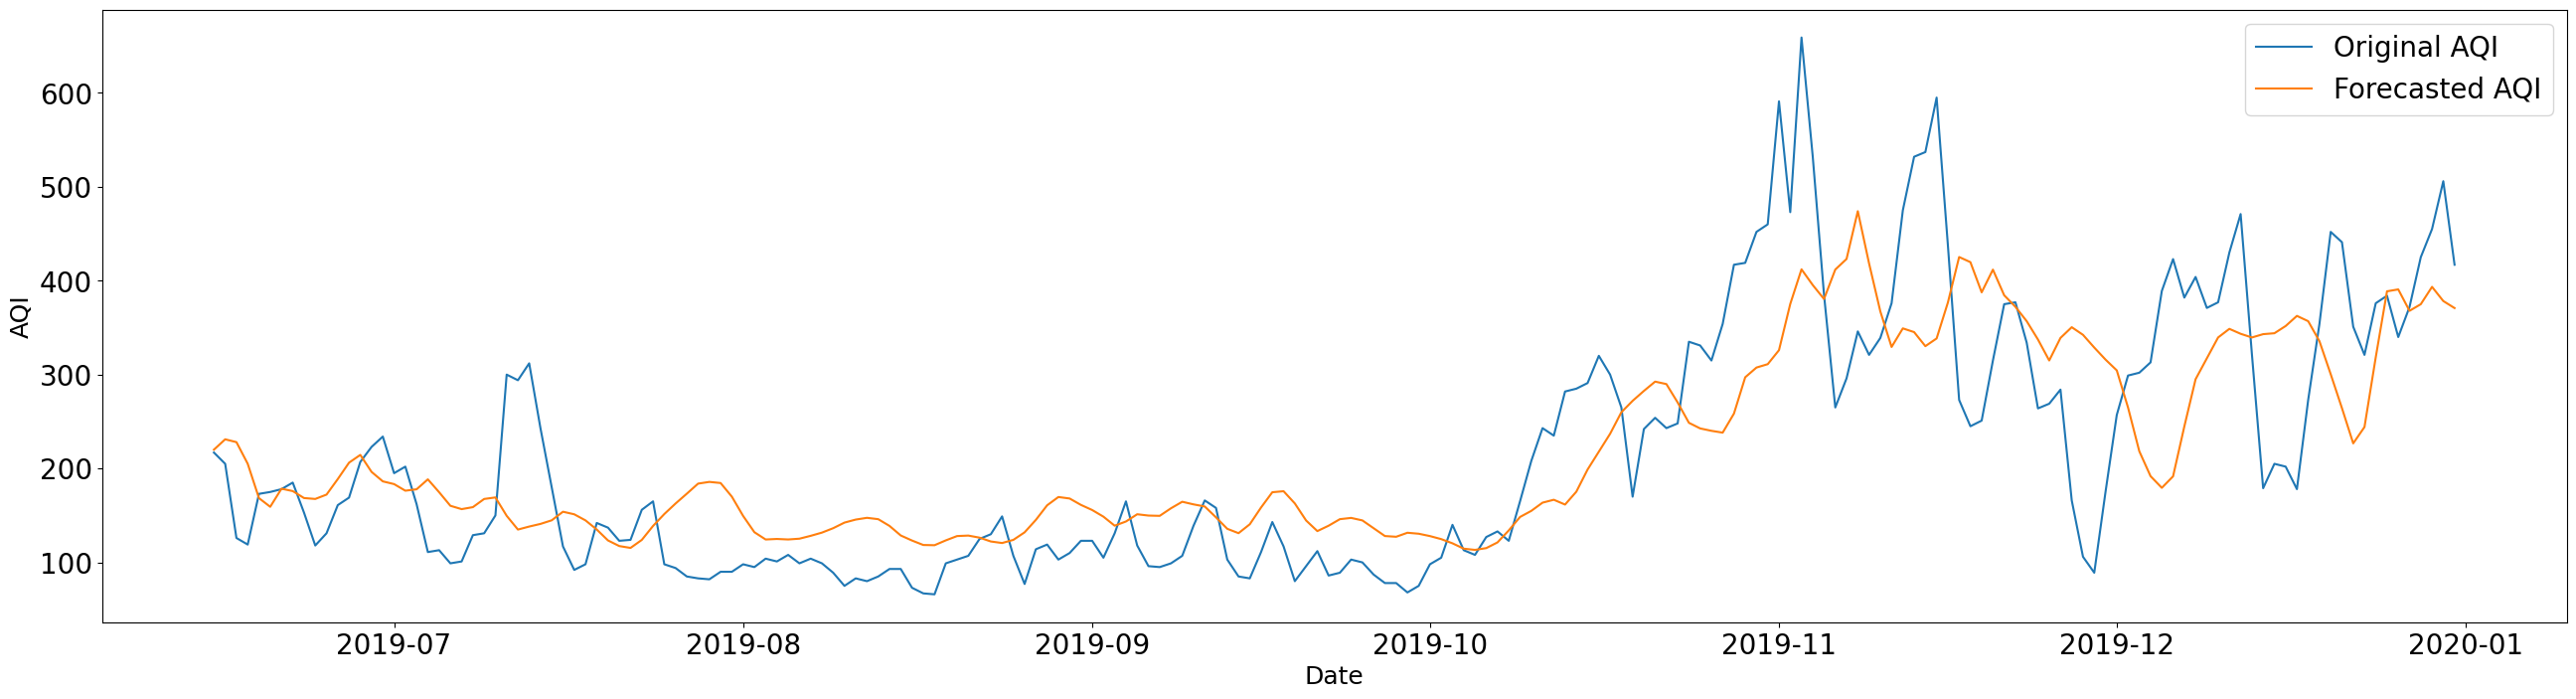

In [ ]:
fig, ax = plt.subplots(figsize=(32, 8))
# Plot the original AQI data
sns.lineplot(x='Date', y='AQI', data=original, label='Original AQI', ax=ax)

# Plot the forecasted AQI data
sns.lineplot(x='Date', y='AQI', data=df_forecast, label='Forecasted AQI', ax=ax)

# Set the x-axis and y-axis labels
ax.set_xlabel('Date',fontsize=18)
ax.set_ylabel('AQI',fontsize=18)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.legend(fontsize=20)

#Evaluate the model

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error
X,Y=original['AQI'],df_forecast['AQI']
print('r2_score',r2_score(X,Y))
print('mean_absolute_percentage_error',mean_absolute_percentage_error(X,Y))
print('mean_squared_error',mean_squared_error(X,Y))

r2_score 0.5562369414137407
mean_absolute_percentage_error 0.37908883030244184
mean_squared_error 7828.910469738334


# result


pso_lstm maxiter=15, future_days=5
r2_score 0.49016765408002316
mean_absolute_error 0.4031190086289297
mean_squared_error 8994.51117787963

pso_lstm maxiter=15, future_days=4
r2_score 0.53967803589807
mean_absolute_percentage_error 0.3364436638840133
mean_squared_error 8121.044270086754

pso_lstm maxiter=15, future_days=3
r2_score 0.6052428470376998
mean_absolute_error 0.29630315934793117
mean_squared_error 6964.343579378656

pso_lstm maxiter=15, future_days=2
r2_score 0.7548163498838283
mean_absolute_percentage_error 0.2439797348079256
mean_squared_error 4325.553486850321

future_days=1
r2_score 0.9255520403597548
mean_absolute_percentage_error 0.149192659600156
mean_squared_error 1313.4180491161312